In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [3]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [4]:
from sklearn.datasets import load_digits

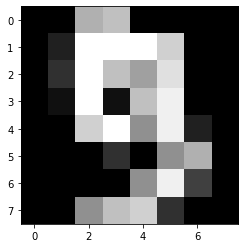

In [5]:
digits = load_digits()
plt.imshow(digits.images[9], cmap=plt.cm.gray)

In [6]:
data = pd.DataFrame(digits.data)

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
data.shape

(1797, 64)

In [9]:
digits.data[0:6]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

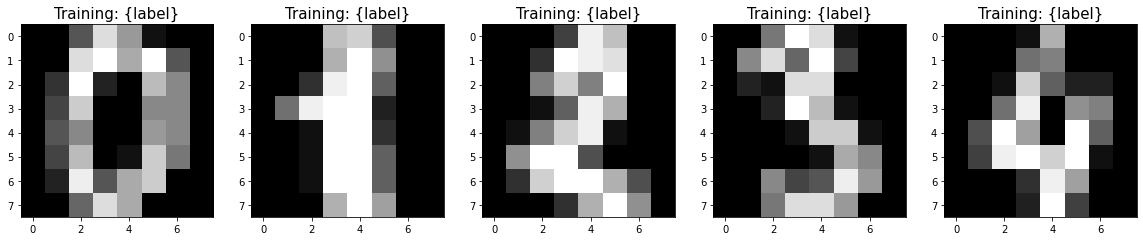

In [10]:
plt.figure(figsize=(20,5))
for index, (image, label) in enumerate (zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title("Training: {label}", fontsize = 15)

In [11]:
x = digits.data
y=digits.target
print("x is:", x)
print("y is:", y)

x is: [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
y is: [0 1 2 ... 8 9 8]


In [12]:
from sklearn.preprocessing import StandardScaler
xstd = StandardScaler().fit_transform(x)
xstd

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [13]:
cov_mat = np.cov(xstd.T)
cov_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

In [15]:
#Calculating the eigenvalues and the eigenvectors:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.29406627, 0.05037444, 0.27692285,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [16]:
eig_vecs

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18223392, -0.04702701,  0.02358821, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.285868  , -0.0595648 , -0.05679875, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.103198  ,  0.24261778, -0.02227952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1198106 ,  0.16508926,  0.10036559, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07149362,  0.07132924,  0.09244589, ...,  0.        ,
         0.        ,  0.        ]])

In [21]:
#Finding the explained variance from the eigenvalues:
total = sum(eig_vals)
total
#Finding individual explained variance:
var_exp = [(i/total) for i in sorted(eig_vals, reverse =True)]
var_exp

[0.12033916097734913,
 0.09561054403097884,
 0.08444414892624558,
 0.06498407907524159,
 0.04860154875966397,
 0.04214119869271938,
 0.039420828035673844,
 0.033893809246383466,
 0.02998221011625225,
 0.029320025512522194,
 0.02781805463550333,
 0.025770550925819966,
 0.022753033157642565,
 0.022271797395143407,
 0.021652294318492516,
 0.019141666064421296,
 0.01775547085168191,
 0.016380692742844243,
 0.01596460168862344,
 0.014891911870878209,
 0.013479695658179348,
 0.012719313702347456,
 0.01165837350591949,
 0.010576465985363178,
 0.00975315947198107,
 0.009445589897319974,
 0.00863013826970725,
 0.008366428536685141,
 0.007976932484112405,
 0.007464713709260619,
 0.00725582151370275,
 0.006919112454811817,
 0.006539085355726168,
 0.006407925738459838,
 0.00591384111722341,
 0.0057116240522352155,
 0.005236368034166346,
 0.004818075864451417,
 0.004537192598584498,
 0.0042316275323278,
 0.0040605306997903755,
 0.003970848082758265,
 0.003564933031426171,
 0.003407871814703001,
 0.

In [22]:
#Finding the cumulative explained variance:
cumexp = np.cumsum(var_exp)
cumexp

array([0.12033916, 0.21594971, 0.30039385, 0.36537793, 0.41397948,
       0.45612068, 0.49554151, 0.52943532, 0.55941753, 0.58873755,
       0.61655561, 0.64232616, 0.66507919, 0.68735099, 0.70900328,
       0.72814495, 0.74590042, 0.76228111, 0.77824572, 0.79313763,
       0.80661732, 0.81933664, 0.83099501, 0.84157148, 0.85132464,
       0.86077023, 0.86940036, 0.87776679, 0.88574372, 0.89320844,
       0.90046426, 0.90738337, 0.91392246, 0.92033038, 0.92624422,
       0.93195585, 0.93719222, 0.94201029, 0.94654748, 0.95077911,
       0.95483964, 0.95881049, 0.96237542, 0.9657833 , 0.96906165,
       0.97217197, 0.97505772, 0.97782262, 0.98041436, 0.98275919,
       0.98494176, 0.98697774, 0.98893286, 0.99076605, 0.99244551,
       0.99405787, 0.9955355 , 0.99688668, 0.99813769, 0.99917465,
       1.        , 1.        , 1.        , 1.        ])

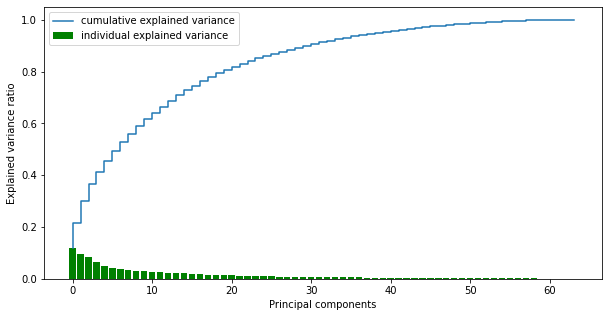

In [27]:
plt.figure(figsize = (10,5))
plt.bar(range(len(var_exp)), var_exp, label='individual explained variance', color = 'g')
plt.step(range(len(cumexp)), cumexp,label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()
plt.show()

In [31]:
x_train,x_test,y_train,y_test=train_test_split(xstd,y,train_size=0.8)
x_train.shape


(1437, 64)

In [32]:
x_test.shape

(360, 64)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

pca=PCA(n_components=25)
pca_x_train=pca.fit_transform(x_train)
pca_x_test=pca.transform(x_test)
rf=DecisionTreeClassifier().fit(pca_x_train,y_train)
predicted=rf.predict(pca_x_test)
predicted

array([9, 2, 4, 4, 0, 3, 9, 9, 8, 2, 1, 8, 1, 4, 1, 8, 8, 3, 4, 7, 1, 5,
       3, 2, 9, 0, 0, 7, 6, 3, 9, 6, 2, 9, 5, 9, 1, 7, 5, 6, 0, 7, 4, 9,
       4, 3, 2, 1, 6, 2, 8, 8, 8, 4, 1, 7, 4, 9, 9, 2, 3, 6, 8, 1, 2, 6,
       4, 7, 3, 7, 6, 1, 0, 2, 9, 3, 5, 9, 3, 3, 2, 4, 6, 9, 1, 0, 7, 3,
       4, 2, 8, 6, 2, 4, 0, 4, 8, 2, 4, 9, 1, 7, 8, 3, 4, 2, 4, 1, 3, 1,
       1, 6, 0, 3, 5, 7, 9, 3, 9, 7, 7, 7, 0, 6, 8, 5, 5, 6, 6, 7, 3, 9,
       7, 6, 7, 1, 8, 7, 6, 6, 1, 0, 8, 5, 4, 5, 7, 6, 6, 2, 5, 7, 7, 5,
       0, 4, 0, 0, 7, 4, 2, 1, 4, 4, 0, 8, 2, 2, 6, 0, 0, 6, 4, 9, 2, 3,
       9, 9, 6, 9, 3, 9, 5, 3, 1, 4, 7, 9, 5, 4, 1, 6, 3, 4, 5, 0, 3, 5,
       7, 7, 2, 3, 4, 8, 5, 6, 2, 4, 0, 8, 7, 0, 0, 6, 3, 4, 2, 9, 8, 8,
       8, 1, 6, 9, 6, 4, 6, 7, 7, 9, 3, 3, 8, 7, 9, 2, 7, 2, 9, 2, 5, 9,
       8, 8, 0, 0, 2, 9, 5, 4, 9, 1, 0, 7, 1, 1, 3, 6, 4, 9, 1, 7, 5, 4,
       4, 0, 4, 5, 2, 9, 3, 0, 3, 1, 6, 9, 8, 8, 4, 9, 2, 1, 6, 7, 4, 2,
       0, 2, 2, 5, 6, 3, 7, 4, 8, 7, 3, 5, 6, 3, 0,

In [35]:
confusion_matrix(predicted,y_test)

array([[28,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 24,  0,  0,  0,  1,  0,  1,  2,  1],
       [ 0,  0, 39,  2,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  1, 28,  0,  0,  0,  1,  1,  3],
       [ 0,  0,  0,  0, 40,  1,  1,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 28,  0,  1,  0,  0],
       [ 0,  0,  1,  0,  1,  0, 36,  0,  0,  0],
       [ 0,  0,  2,  1,  2,  1,  1, 35,  1,  0],
       [ 1,  0,  0,  4,  0,  0,  0,  1, 26,  1],
       [ 1,  2,  1,  5,  1,  1,  0,  4,  1, 22]], dtype=int64)

In [36]:
accuracy_score(predicted,y_test)

0.85

In [37]:
def get_misclassified_index(y_pred,y_test):
    misclassification=[]
    for index,(predicted,actual) in enumerate(zip(y_pred,y_test)):
        if predicted!=actual:
            misclassification.append(index)
    return misclassification

In [38]:
misclassification=get_misclassified_index(predicted,y_test)
misclassification[0:5]

[0, 6, 7, 23, 24]

In [43]:
def plot_misclassification(misclassification):
    plt.figure(figsize=(20,4))
    for index,wrong in enumerate(misclassification[0:5]):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(pca_x_test[wrong],(5,5)),cmap=plt.cm.gray)
        plt.title('predicted:{}Actual:{}'.format(predicted[wrong],y_test[wrong]))

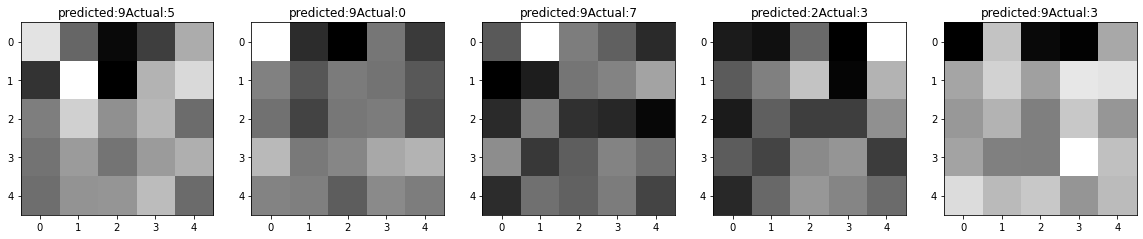

In [44]:
plot_misclassification(misclassification)